# A. Programming

## Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

In [6]:
dataset_path = 'credit_card\creditcard.csv'
df = pd. read_csv (dataset_path, delimiter = ',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
classnum = pd.Series(df['Class']).value_counts()
print(classnum)

Class
0    284315
1       492
Name: count, dtype: int64


In [14]:
dataset_arr = df.values
X = dataset_arr[:, :-1]
y = dataset_arr[:, -1].astype(np.uint8)

In [16]:
X, y

(array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
          1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
        [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
        [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
         -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
        ...,
        [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
          4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
        [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
          1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
        [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [36]:
interceps = np.ones((X.shape[0], 1))
X_b = np.hstack([interceps, X])

In [38]:
X_b

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.72788000e+05, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  1.72788000e+05, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  1.72792000e+05, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [45]:
n_classes = np.unique(y, axis =0).shape[0]
n_samples = y.shape[0]
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

print(y_encoded)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [40]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b , y_encoded,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train , y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [41]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [50]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[: , None]

def predict (X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

# Cross-entropy loss
def compute_loss (y_hat , y) :
    n = y.size
    y_hat = np.clip(y_hat , 1e-7 , 1 - 1e-7)

    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y)) / n

def update_theta (theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy (X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat , axis=1) == np.argmax(y, axis=1)).mean()
    
    return acc

In [49]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
np.random.seed(random_state)
theta = np.random.uniform(size =(n_features, n_classes))

In [51]:
# epoch accuracy and loss lists 
train_accs = []
train_losses = []
val_accs = []
val_losses = []
for epoch in range ( epochs ) :
    # accuracy and loss lists for each batch in an epoch
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range (0, X_train.shape[0], batch_size) :
        # 2d array shape
        X_i = X_train[i:i+ batch_size]
        # 1d array shape
        y_i = y_train[i:i+ batch_size]

        # 1d array shape
        y_hat = predict(X_i, theta)

        # return a number
        train_loss = compute_loss(y_hat, y_i)

        # return (n_features, n_classes)
        gradient = compute_gradient(X_i , y_i, y_hat)

        # return (n_features, n_classes)
        theta = update_theta(theta, gradient, lr)

        # compute losses and accs
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    # After training all batches in an epoch
    mean_train_batch_loss = sum ( train_batch_losses ) / len (  train_batch_losses )
    mean_val_batch_loss = sum ( val_batch_losses ) / len ( val_batch_losses )
    mean_train_batch_acc = sum ( train_batch_accs ) / len ( train_batch_accs )
    mean_val_batch_acc = sum ( val_batch_accs ) / len ( val_batch_accs )

    train_losses . append ( mean_train_batch_loss )
    val_losses . append ( mean_val_batch_loss )
    train_accs . append ( mean_train_batch_acc )
    val_accs . append ( mean_val_batch_acc )

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : {mean_train_batch_loss :.3f}\tValidation loss : {mean_val_batch_loss :.3f}')


EPOCH 1:	Training loss : 0.307	Validation loss : 0.306

EPOCH 2:	Training loss : 0.176	Validation loss : 0.175

EPOCH 3:	Training loss : 0.114	Validation loss : 0.113

EPOCH 4:	Training loss : 0.081	Validation loss : 0.081

EPOCH 5:	Training loss : 0.063	Validation loss : 0.062

EPOCH 6:	Training loss : 0.050	Validation loss : 0.050

EPOCH 7:	Training loss : 0.042	Validation loss : 0.042

EPOCH 8:	Training loss : 0.036	Validation loss : 0.036

EPOCH 9:	Training loss : 0.032	Validation loss : 0.031

EPOCH 10:	Training loss : 0.028	Validation loss : 0.028

EPOCH 11:	Training loss : 0.026	Validation loss : 0.025

EPOCH 12:	Training loss : 0.023	Validation loss : 0.023

EPOCH 13:	Training loss : 0.022	Validation loss : 0.021

EPOCH 14:	Training loss : 0.020	Validation loss : 0.020

EPOCH 15:	Training loss : 0.019	Validation loss : 0.018

EPOCH 16:	Training loss : 0.018	Validation loss : 0.017

EPOCH 17:	Training loss : 0.017	Validation loss : 0.016

EPOCH 18:	Training loss : 0.016	Validat

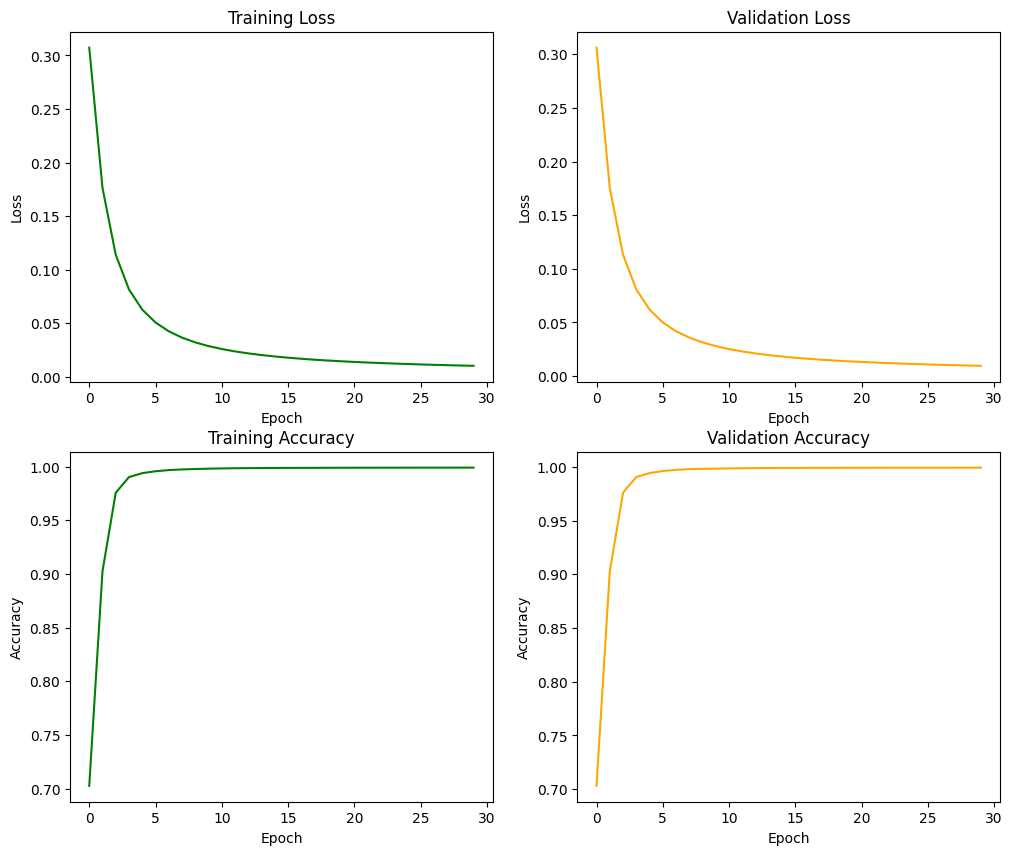

In [54]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot ( train_losses, 'green')
ax [0 , 0]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 0]. set_title ('Training Loss')

ax [0 , 1]. plot ( val_losses ,'orange')
ax [0 , 1]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 1]. set_title ('Validation Loss')

ax [1 , 0]. plot ( train_accs, 'green' )
ax [1 , 0]. set ( xlabel ='Epoch' , ylabel ='Accuracy')
ax [1 , 0]. set_title ('Training Accuracy')

ax [1 , 1]. plot ( val_accs , 'orange' )
ax [1 , 1]. set ( xlabel ='Epoch' , ylabel ='Accuracy')
ax [1 , 1]. set_title ('Validation Accuracy')

plt.show()

In [55]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy (X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.9992626663389628
Accuracy : 0.9991222218320986


## Twitter Sentiment Analysis

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [58]:
dataset_path = 'twitter_sentiment\Twitter_Data.csv'
df = pd.read_csv (dataset_path)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [60]:
df = df. dropna ()

In [78]:
def text_normalize ( text ) :
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text )
    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text )
    # Hashtags removal
    text = re.sub(r'#', '', text )

    # Punctuation removal
    text = re.sub (r'[^\w\s]', '', text )

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [79]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [80]:
interceps = np.ones((X.shape[0], 1))
X_b = np.hstack([interceps, X])

In [81]:
X_b[:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
n_classes = df['category'].nunique ()
n_samples = df['category'].size
y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

print(y_encoded)

IndexError: index 255 is out of bounds for axis 1 with size 3